In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV    #RandomizedSearchCV also can be used and it is fater than Gridsearch but a little less accurate
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Concrete Strength Prediction/Concrete_Data_Yeh.csv")
df=pd.DataFrame(df)
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# Describe

### Aggregates:Aggregate is the material bond with the cement paste after reacting with water. Therefore, the quality of the aggregate effect on the strength of concrete.Generally, 80% of the volume concrete is filled by aggregates. There are two types of aggregates namely coarse aggregate and fine aggregate.
### Age:With time concrete strength increases but it does not increase proportionately.
### Superplasticizers: Superplasticizers reduce the water requirement by 15 to 20% without affecting the workability leading to high strength and dense concrete. This strength increase will be for the same cement content with the reduction of the amount of water. Further, we can reduce the cement content by adding a superplasticizer to keep the required strength. By that, we can save some money.Overdosage could reduce compressive strength also.
###  water-cement ratio : it is one of the most important factors affecting strength of concrete. Depending on the water-cement ratio, the compressive strength is defined in the mix designs.increase of the water/cement ration reduces the compressive strength (So I would add this feature to  df)
#### Ref: https://www.structuralguide.com/factors-affecting-strength-of-concrete/

# Add an important feature

In [ ]:
df.insert(8,"water_per_cement",df['water']/df['cement'])   #add this feature before csMPa column

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895825,86.279342,0.000000,0.000000,22.000000,142.950000,359.400000
flyash,1030.0,54.188350,63.997004,0.000000,0.000000,0.000000,118.300000,200.100000
water,1030.0,181.567282,21.354219,121.800000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.204660,5.973841,0.000000,0.000000,6.400000,10.200000,32.200000
coarseaggregate,1030.0,972.918932,77.753954,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineaggregate,1030.0,773.580485,80.175980,594.000000,730.950000,779.500000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
water_per_cement,1030.0,0.748266,0.314005,0.266893,0.533333,0.675349,0.935165,1.882353
csMPa,1030.0,35.817961,16.705742,2.330000,23.710000,34.445000,46.135000,82.600000


# Correlation
### corr. of features and target to find possible linear relations (Corr range is [-1,1])
### The correlation coefficient only measures linear correlations (“as x goes up, y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “as x approaches 0, y generally goes up”)
### Notice that this has nothing to do with the slope
##### refrence:"Hand on machine learning" by Aurélien Géron

<Axes: >

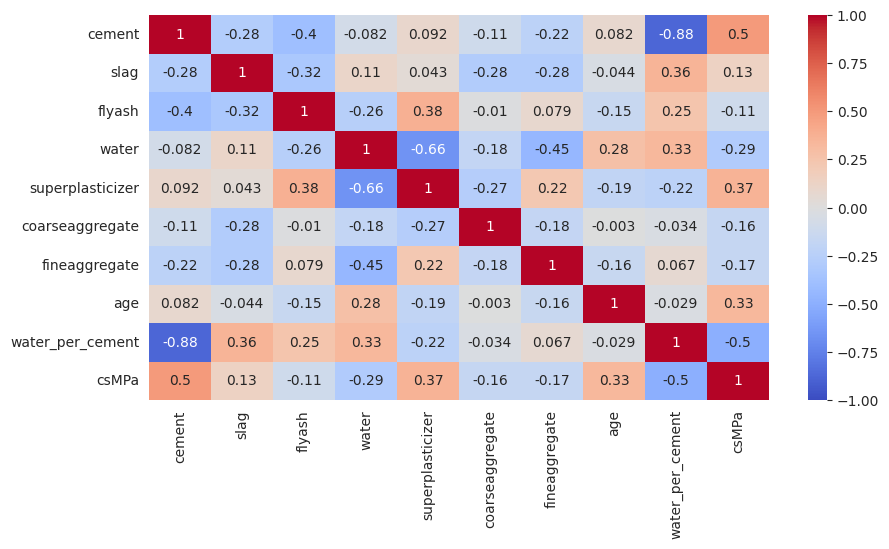

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmax=1,vmin=-1)

#also this code can be used
# corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm')

In [ ]:
corr=df.corr()
corr['csMPa'].sort_values(ascending=False)

csMPa               1.000000
cement              0.497832
superplasticizer    0.366079
age                 0.328873
slag                0.134829
flyash             -0.105755
coarseaggregate    -0.164935
fineaggregate      -0.167241
water              -0.289633
water_per_cement   -0.500692
Name: csMPa, dtype: float64

# Visualisation

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=4)
fig.add_trace(go.Box(y=df["cement"],name='cement'),row=1,col=1)
fig.add_trace(go.Box(y=df["slag"],name='slag'),row=1,col=2)
fig.add_trace(go.Box(y=df["flyash"],name='flyash'),row=1,col=3)
fig.add_trace(go.Box(y=df["water"],name='water'),row=1,col=4)
fig.add_trace(go.Box(y=df["superplasticizer"],name='superplasticizer'),row=2,col=1)
fig.add_trace(go.Box(y=df["coarseaggregate"],name='coarseaggregate'),row=2,col=2)
fig.add_trace(go.Box(y=df["fineaggregate"],name='fineaggregate'),row=2,col=3)
fig.add_trace(go.Box(y=df["age"],name='age'),row=2,col=4)
fig.add_trace(go.Box(y=df["water_per_cement"],name='water_per_cement'),row=3,col=1)
fig.add_trace(go.Box(y=df["csMPa"],name='csMPa'),row=3,col=2)

fig.update_layout(height=800, width=1000, title_text="Box plot")
fig.show()

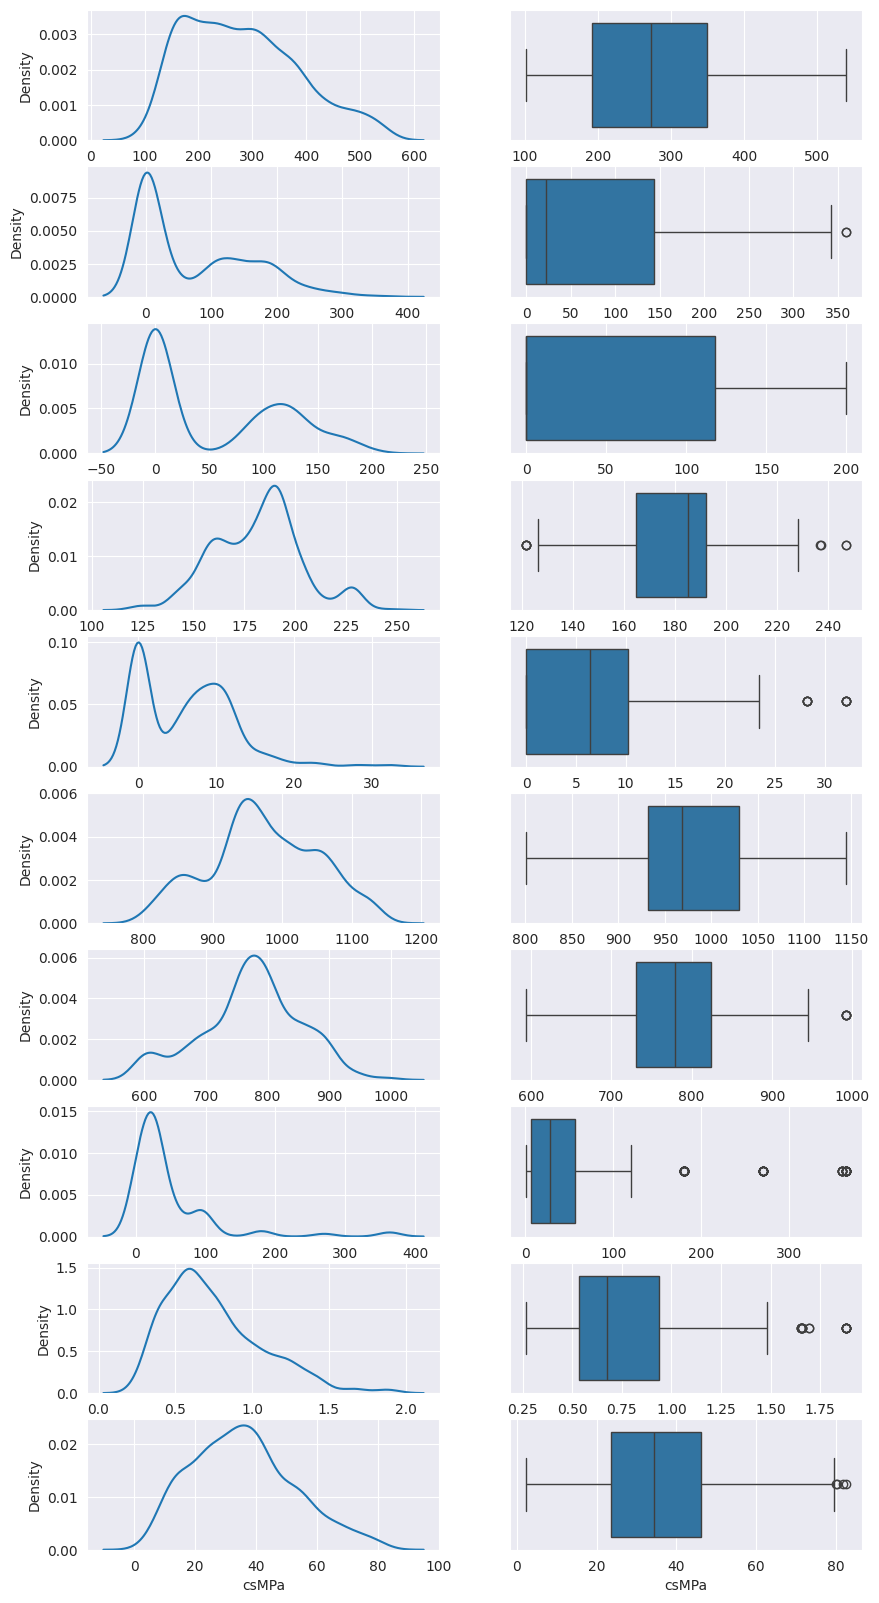

In [ ]:
plt.figure(figsize=(10,20))
rows = df.columns.shape[0]
k = 1
sns.set_style('darkgrid')
for i in df.columns:
    plt.subplot(rows,2,k)
    sns.kdeplot(df,x=i)
    plt.subplot(rows,2,k+1)
    sns.boxplot(df,x=i)
    k += 2
plt.show()

#### To check skewness of the features we can look at the top fig or use df.skew()
##### Positive Skewness     :  0.5 to 1   and >1
##### Negative Skewness     :  -0.5 to -1 and <-1
##### Normally Distributed  : -0.5 to 0.5

In [ ]:
df.skew()

cement              0.509481
slag                0.800717
flyash              0.537354
water               0.074628
superplasticizer    0.907203
coarseaggregate    -0.040220
fineaggregate      -0.253010
age                 3.269177
water_per_cement    0.958072
csMPa               0.416977
dtype: float64

## As it can be seen some features like slag,superplasticizer,age and water_per_cement are skewed
## When a feature’s distribution has a heavy tail (i.e., when values far from the mean are not exponentially rare), both min-max and standardization will squash most values into a small range.
##  Machine learning models generally don’t like this at all So before you scale the feature, you should first transform it to shrink the heavy tail,
##  and if possible to make the distribution roughly symmetrical.
## There are several wayes to do that, like replace the positive features with its square root (or raise the feature to a power between 0 and 1) or transform to its logarithm

In [ ]:
df1=df.copy()

# Features Transformation
## to reduce their skewness and make them likely to Normal distribution

In [ ]:
df1['age']=np.log10(df1['age'])
df1['water_per_cement']=np.log(df1['water_per_cement'])



```
# This is formatted as code
```

#### superplasticizer is Bimodal---- there are several ways to transform like power to 0,1 OR arcsinh

In [ ]:
print("first mode of superplasticizer is:" ,df1['superplasticizer'].value_counts().index.tolist()[0],"\n",
"second mode is:",df1['superplasticizer'].value_counts().index.tolist()[1])

first mode of superplasticizer is: 0.0 
 second mode is: 11.6


In [ ]:
df1['superplasticizer']=df1['superplasticizer']**0.5   #arcsinh also may be used
df1['slag']=df1['slag']**0.2

# Model construction

In [ ]:
# Seperate x,y from df1
x=df1.drop('csMPa',axis=1)
y=df1['csMPa'].values.reshape(-1,1)

# Feature scaling
#### Note: scaling is for x only
#### Unlike minmax scaling, standardization does not restrict values to a specific range.However, standardization is much less affected by outliers.

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x=pd.DataFrame(x, columns=df1.columns.drop('csMPa'))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Linear regression

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred_trn=regressor.predict(x_train)
y_pred_tst=regressor.predict(x_test)

print("R2 core for train:", metrics.r2_score(y_train,y_pred_trn))
print("R2 core for test:", metrics.r2_score(y_test,y_pred_tst))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred_tst))

R2 core for train: 0.801477327379186
R2 core for test: 0.8283492435940422
Mean Squared Error: 45.209314891316346


# RandomForest reg.

In [ ]:
# Gridsearch to find optimum hyperparameter
parameters={
    "n_estimators": range(100,120)
    }
regressor=RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(regressor, parameters,cv=5,verbose=1,n_jobs=-1)
grid_search.fit(x_train,y_train.ravel())
n=grid_search.best_params_
print(n)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 111}


In [ ]:
regressor=RandomForestRegressor(n_estimators=n['n_estimators'],random_state=0)
regressor.fit(x_train,y_train.ravel())
y_pred=regressor.predict(x_test)
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

R2 score: 0.9221489387700404
Mean Squared Error: 20.504384690531005


## SVM reg.

In [ ]:
regressor=svm.SVR()
regressor.fit(x_train,y_train.ravel())
y_pred=regressor.predict(x_test)
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

R2 score: 0.8174364917065734
Mean Squared Error: 48.08351158430719


# KNN reg.

In [ ]:
parameters={
    "n_neighbors":[3,4,5,6,7,8,9]
    }
knn=KNeighborsRegressor()
gridsearch=GridSearchCV(knn,parameters,cv=7,n_jobs=-1,verbose=1)
gridsearch.fit(x_train,y_train)
print(gridsearch.best_params_)
result=pd.DataFrame(gridsearch.cv_results_)
result

Fitting 7 folds for each of 7 candidates, totalling 49 fits
{'n_neighbors': 4}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006146,0.001872,0.006921,0.003003,3,{'n_neighbors': 3},0.755409,0.784688,0.875068,0.869584,0.851589,0.878390,0.830552,0.835040,0.044474,2
1,0.006652,0.003347,0.006420,0.002711,4,{'n_neighbors': 4},0.753551,0.803285,0.872183,0.878171,0.841260,0.889985,0.859011,0.842492,0.044932,1
2,0.004566,0.000734,0.005304,0.000646,5,{'n_neighbors': 5},0.747217,0.791454,0.866628,0.870860,0.827333,0.880979,0.847635,0.833158,0.045035,3
3,0.004375,0.000239,0.005505,0.000661,6,{'n_neighbors': 6},0.752003,0.789335,0.869733,0.853463,0.818082,0.865382,0.848302,0.828043,0.040653,4
4,0.006628,0.000960,0.007092,0.000915,7,{'n_neighbors': 7},0.749236,0.787771,0.871653,0.848797,0.814301,0.865124,0.849023,0.826558,0.041668,5
5,0.007339,0.002264,0.008815,0.002668,8,{'n_neighbors': 8},0.755859,0.786967,0.862230,0.848691,0.798923,0.851323,0.850732,0.822104,0.038080,6
6,0.004443,0.000308,0.005259,0.000773,9,{'n_neighbors': 9},0.759657,0.783914,0.849486,0.841064,0.787075,0.845009,0.844787,0.815856,0.034765,7


In [ ]:
regressor=KNeighborsRegressor(n_neighbors=4)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

R2 score: 0.879242548959911
Mean Squared Error: 31.805054308252426


# Lasso reg.

In [ ]:
from sklearn import linear_model
parameters={
   "alpha":[0.1,0.2,0.3,0.4,0.5,0.6,1]
    }
regressor=linear_model.Lasso()
gridsearch=GridSearchCV(regressor,parameters,cv=5,n_jobs=-1,verbose=1)
gridsearch.fit(x_train,y_train)
print(gridsearch.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'alpha': 0.1}


In [ ]:
regressor=linear_model.Lasso(alpha=0.1)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

R2 score: 0.8283219640040769
Mean Squared Error: 45.21649977997438


# Ridge reg.

In [ ]:
parameters={
   "alpha":[0.1,0.2,0.3,0.4,0.5,0.6,1]
    }
regressor=Ridge()
gridsearch=GridSearchCV(regressor,parameters,cv=5,n_jobs=-1,verbose=1)
gridsearch.fit(x_train,y_train)
print(gridsearch.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'alpha': 1}


In [ ]:
regressor=Ridge(alpha=1)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

R2 score: 0.828379619113843
Mean Squared Error: 45.20131459776439


# XGB reg.

In [ ]:
regressor=XGBRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred_tst))

R2 score: 0.9236477687242304
Mean Squared Error: 45.209314891316346


## As it can be seen, Randomforest and XGBregression had better R2scores